In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA

np.random.seed(42)

# 1. Generate Double-Spiral Structure

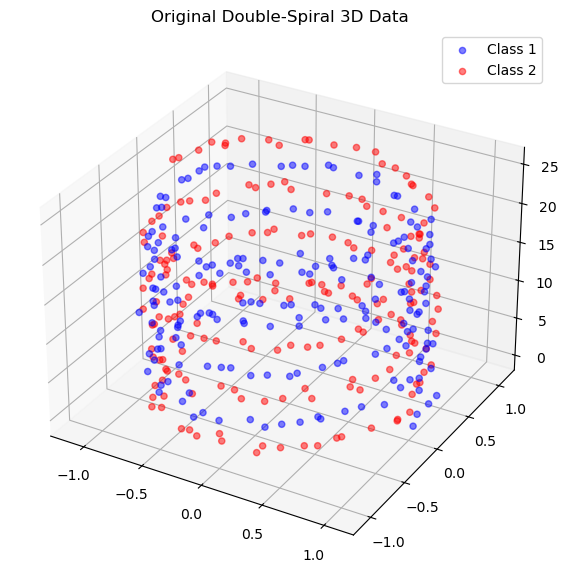

In [6]:
theta = np.linspace(0, 8 * np.pi, 200)

x1 = np.cos(theta) + np.random.normal(0, 0.05, len(theta))
y1 = np.sin(theta) + np.random.normal(0, 0.05, len(theta))
z1 = theta + np.random.normal(0, 0.1, len(theta))

x2 = -np.cos(theta) + np.random.normal(0, 0.05, len(theta))
y2 = -np.sin(theta) + np.random.normal(0, 0.05, len(theta))
z2 = theta + np.random.normal(0, 0.1, len(theta))

data_class1 = np.column_stack((x1, y1, z1))
data_class2 = np.column_stack((x2, y2, z2))
X = np.vstack((data_class1, data_class2))

y = np.hstack((np.zeros(len(theta)), np.ones(len(theta))))

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, y1, z1, c='blue', alpha=0.5, label='Class 1')
ax.scatter(x2, y2, z2, c='red', alpha=0.5, label='Class 2')
ax.set_title("Original Double-Spiral 3D Data")
ax.legend()
plt.show()

# 2. Standard PCA (No Dimension Reduction)

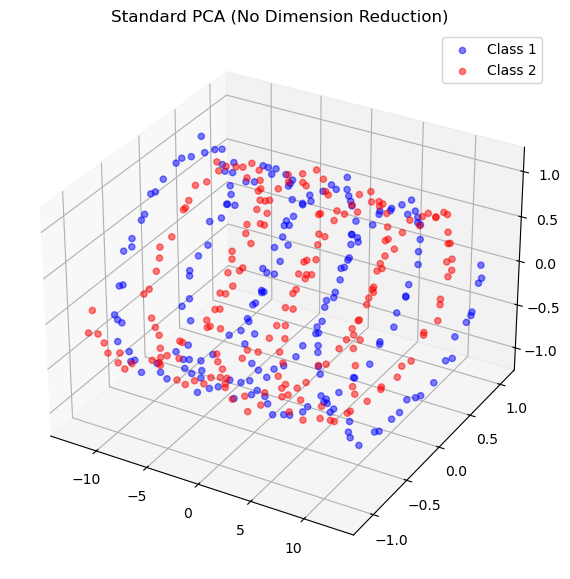

In [7]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[y==0, 0], X_pca[y==0, 1], X_pca[y==0, 2], c='blue', alpha=0.5, label='Class 1')
ax.scatter(X_pca[y==1, 0], X_pca[y==1, 1], X_pca[y==1, 2], c='red', alpha=0.5, label='Class 2')
plt.title("Standard PCA (No Dimension Reduction)")
ax.legend()
plt.grid(True)
plt.show()

# 3. Built-in KPCA (sklearn)

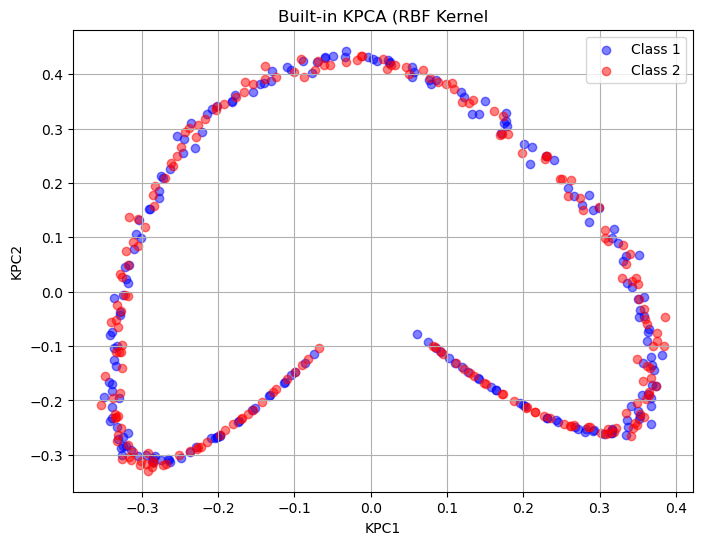

In [8]:
kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='blue', alpha=0.5, label='Class 1')
plt.scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='red', alpha=0.5, label='Class 2')
plt.title(f"Built-in KPCA (RBF Kernel")
plt.xlabel("KPC1")
plt.ylabel("KPC2")
plt.legend()
plt.grid(True)
plt.show()

# 4. Comparison of Kernels

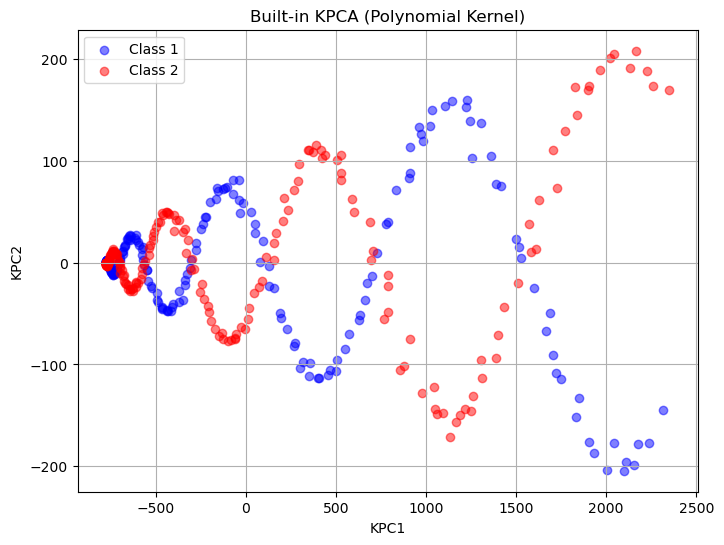

In [9]:
kpca = KernelPCA(n_components=2, kernel='poly', degree=3)
X_kpca = kpca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='blue', alpha=0.5, label='Class 1')
plt.scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='red', alpha=0.5, label='Class 2')
plt.title("Built-in KPCA (Polynomial Kernel)")
plt.xlabel("KPC1")
plt.ylabel("KPC2")
plt.legend()
plt.grid(True)
plt.show()

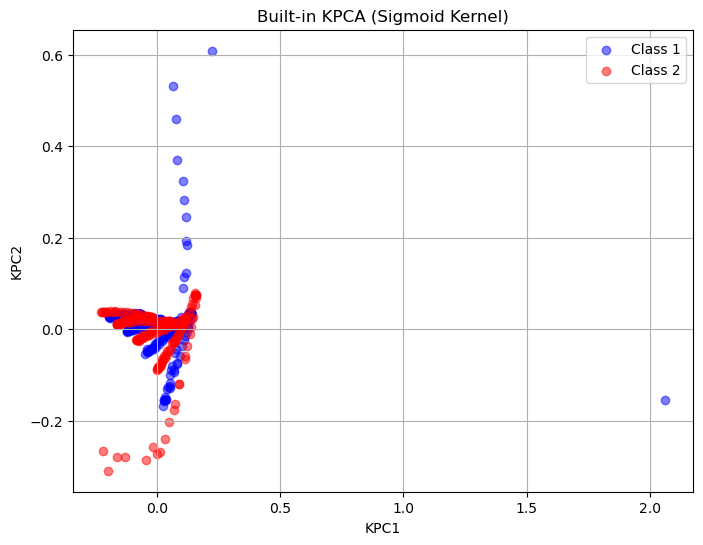

In [10]:
kpca = KernelPCA(n_components=2, kernel='sigmoid')
X_kpca = kpca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='blue', alpha=0.5, label='Class 1')
plt.scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='red', alpha=0.5, label='Class 2')
plt.title("Built-in KPCA (Sigmoid Kernel)")
plt.xlabel("KPC1")
plt.ylabel("KPC2")
plt.legend()
plt.grid(True)
plt.show()

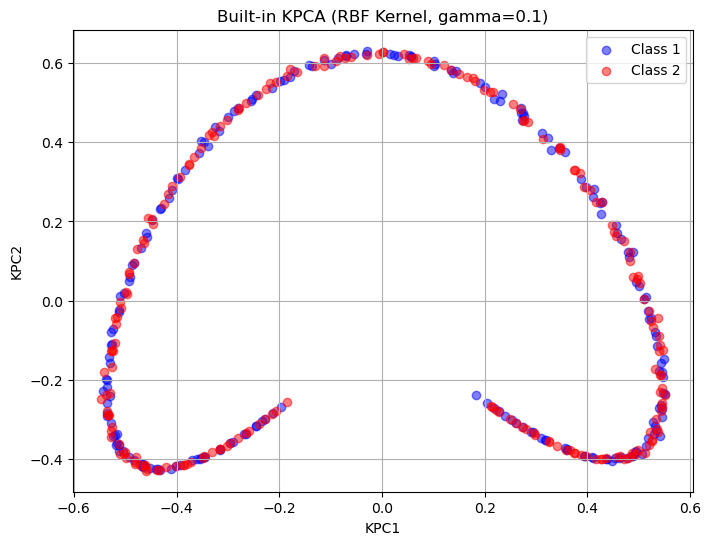

In [11]:
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.1)
X_kpca = kpca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='blue', alpha=0.5, label='Class 1')
plt.scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='red', alpha=0.5, label='Class 2')
plt.title("Built-in KPCA (RBF Kernel, gamma=0.1)")
plt.xlabel("KPC1")
plt.ylabel("KPC2")
plt.legend()
plt.grid(True)
plt.show()

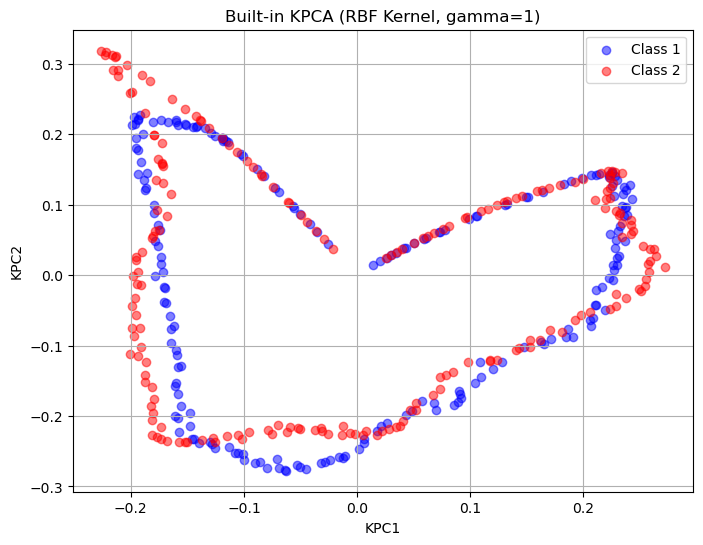

In [12]:
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=1)
X_kpca = kpca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='blue', alpha=0.5, label='Class 1')
plt.scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='red', alpha=0.5, label='Class 2')
plt.title("Built-in KPCA (RBF Kernel, gamma=1)")
plt.xlabel("KPC1")
plt.ylabel("KPC2")
plt.legend()
plt.grid(True)
plt.show()

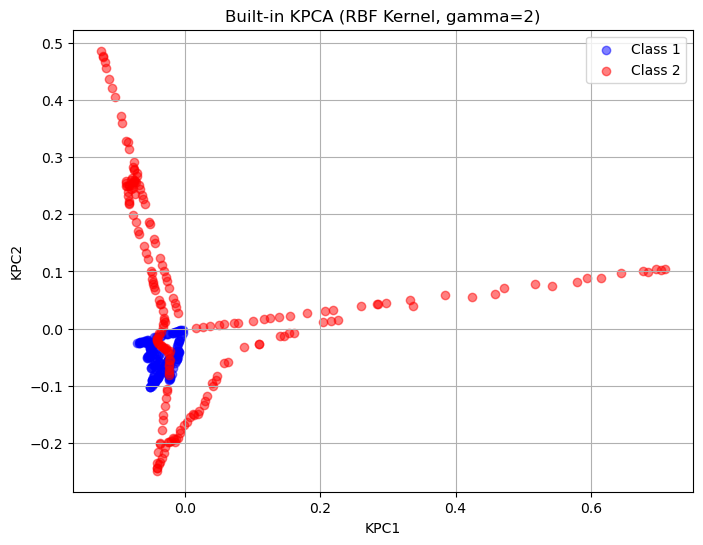

In [13]:
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=2)
X_kpca = kpca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='blue', alpha=0.5, label='Class 1')
plt.scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='red', alpha=0.5, label='Class 2')
plt.title("Built-in KPCA (RBF Kernel, gamma=2)")
plt.xlabel("KPC1")
plt.ylabel("KPC2")
plt.legend()
plt.grid(True)
plt.show()

# 5. KPCA From Scratch

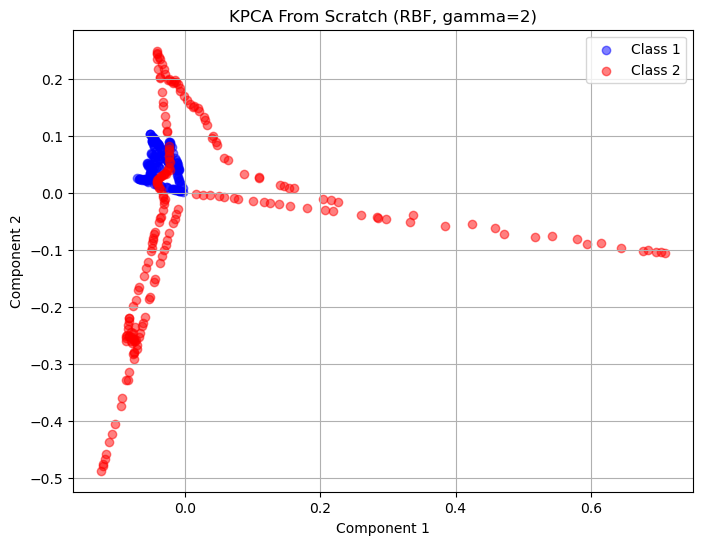

In [14]:
from scipy.spatial.distance import squareform, pdist

def my_rbf_kernel(X, gamma):
    """
    Computes the RBF (Gaussian) kernel matrix.
    K(x, y) = exp(-gamma * ||x - y||^2)
    """

    sq_dists = squareform(pdist(X, 'sqeuclidean'))
    
    K = np.exp(-gamma * sq_dists)
    return K

def kpca_custom(X, n_components=2, gamma=2.0):
    # 1. Compute the Kernel Matrix (Gram Matrix)
    K = my_rbf_kernel(X, gamma)
    N = K.shape[0]
    
    # 2. Center the Kernel Matrix (in Feature Space)
    # Formula: K_centered = K - 1_N K - K 1_N + 1_N K 1_N
    one_n = np.ones((N, N)) / N
    K_centered = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    # 3. Eigendecomposition
    # We use eigh because K is symmetric
    eigenvalues, eigenvectors = np.linalg.eigh(K_centered)
    
    # 4. Sort eigenvalues and eigenvectors in descending order
    # eigh returns them in ascending order, so we reverse them
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    # 5. Select top components
    alphas = eigenvectors[:, :n_components]
    lambdas = eigenvalues[:n_components]
    
    # 6. Project data
    # The projection of the data points onto the principal components 
    # is given by the eigenvectors scaled by sqrt(eigenvalues)
    X_new = alphas * np.sqrt(lambdas)
    
    return X_new

# Execute custom KPCA
X_custom = kpca_custom(X, n_components=2, gamma=2)

plt.figure(figsize=(8, 6))
plt.scatter(X_custom[y==0, 0], X_custom[y==0, 1], color='blue', alpha=0.5, label='Class 1')
plt.scatter(X_custom[y==1, 0], X_custom[y==1, 1], color='red', alpha=0.5, label='Class 2')
plt.title("KPCA From Scratch (RBF, gamma=2)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.grid(True)
plt.show()